# Scaling Exercises
Not graded per Zach 18 March 202

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd

import classification_acquire
import classification_prepare

Here is a histogram of the dataset we will be working with.


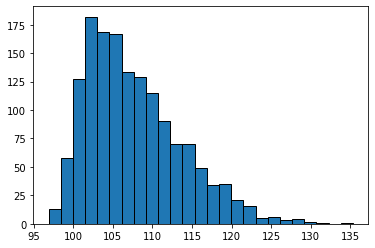

In [2]:
np.random.seed(123)

x = stats.skewnorm(7).rvs(1500) * 10 + 100
x = x.reshape(-1, 1)

plt.hist(x, bins=25,ec='black')
print('Here is a histogram of the dataset we will be working with.')

- Do your work for these exercises in a jupyter notebook named scaling. Use the telco dataset you acquired and prepped in previous lesson. Once you are finished, you may wish to repeat the exercises on another dataset for additional practice.

In [6]:
df = classification_acquire.get_telco_data()

Reading from csv file...


In [8]:
df = classification_prepare.clean_telco_data(df)

In [9]:
df.head()

,customer_id,is_senior,tenure_months,monthly_charges,total_charges,contract_type,internet_service_type,payment_type,is_male_Male,has_partner_Yes,...,has_streaming_movies_Yes,has_paperless_billing_Yes,did_churn_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,2162-FRZAA,0,63,39.35,2395.05,Two year,DSL,Bank transfer (automatic),1,1,...,0,0,0,0,1,0,0,0,0,0
1,2160-GPFXD,0,54,65.65,3566.70,Two year,DSL,Credit card (automatic),1,1,...,0,1,0,0,1,0,0,1,0,0
2,2157-MXBJS,0,13,75.30,989.45,One year,DSL,Mailed check,1,1,...,1,1,1,1,0,0,0,0,0,1
3,2155-AMQRX,0,28,54.90,1505.15,Month-to-month,DSL,Credit card (automatic),0,0,...,0,1,0,0,0,0,0,1,0,0
4,2150-WLKUW,0,40,63.90,2635.00,One year,DSL,Bank transfer (automatic),0,1,...,0,0,0,1,0,0,0,0,0,0


## 1. 

In [11]:
def train_validate_test_split(df, target, seed=123):
    train_validate, test = train_test_split(df, test_size=0.2, 
                                            random_state=seed)
    train, validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed)
    
    print(f'train --> {train.shape}')
    print(f'validate --> {validate.shape}')
    print(f'test --> {test.shape}')
    
    return train, validate, test

In [21]:
train, validate, test = train_validate_test_split(df, target='did_churn_Yes', seed=123)

X_train = train.drop(columns=['did_churn_Yes'])
y_train = train.did_churn_Yes

X_validate = validate.drop(columns=['did_churn_Yes'])
y_validate = validate.did_churn_Yes

X_test = test.drop(columns=['did_churn_Yes'])
y_test = test.did_churn_Yes

train --> (3937, 35)
validate --> (1688, 35)
test --> (1407, 35)


Apply the scalers we talked about in this lesson to your data and visualize the results for the unscaled and scaled distribution.

### MIN MAX Scaler

Min Max Scaler


Text(0.5, 1.0, 'Scaled')

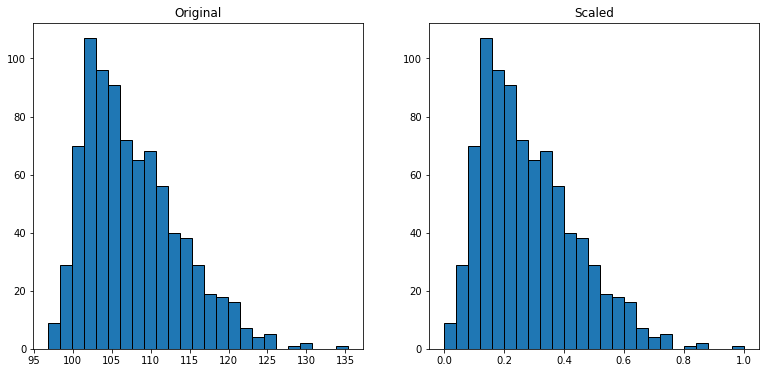

In [17]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

print('Min Max Scaler')
plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

## Standard Scaler

Text(0.5, 1.0, 'Scaled')

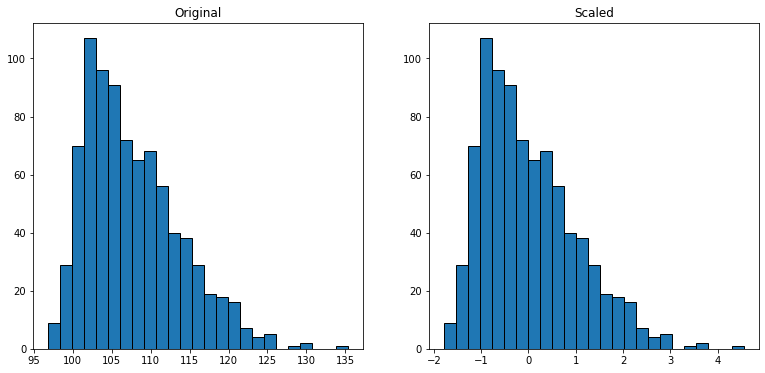

In [18]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

### Robust Scaler

Text(0.5, 1.0, 'Scaled')

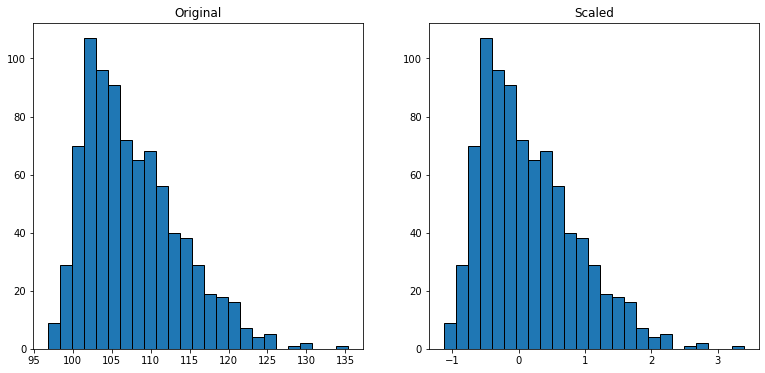

In [20]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='black')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='black')
plt.title('Scaled')

## 2. 

Apply the .inverse_transform method to your scaled data. Is the resulting dataset the exact same as the original data?

## 3. 

Read the documentation for sklearn's QuantileTransformer. Use normal for the output_distribution and apply this scaler to your data. Visualize the result of your data scaling.

## 4. 

Use the QuantileTransformer, but omit the output_distribution argument. Visualize your results. What do you notice?

## 5. 

Based on the work you've done, choose a scaling method for your dataset. Write a function within your prepare.py that accepts as input the train, validate, and test data splits, and returns the scaled versions of each. Be sure to only learn the parameters for scaling from your training data!